This note book is dedicated to evaluating agents

In [ ]:
!pip install -e disneyenv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import disneyenv
from stable_baselines3.common.callbacks import ProgressBarCallback,StopTrainingOnMaxEpisodes

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_performance(arr_reward,arr_travel,agent_name):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.suptitle("Performance for "+agent_name)
    ax1.set_title("Reward")
    ax1.plot(np.arange(len(arr_reward)),arr_reward)
    ax1.axhline(y = np.mean(arr_reward),ls = "dashed",color = "red")
    ax1.set_xlabel("Days")
    ax1.set_ylabel("Reward")
    ax1.set_ylim([100,500])

    ax2.set_title("Total travel time")
    ax2.plot(np.arange(len(arr_travel)),arr_travel,c = "orange")
    ax2.axhline(y = np.mean(arr_travel),ls = "dashed",color = "red")
    ax2.set_xlabel("Days")
    ax2.set_ylim([100,500])
    ax2.set_ylabel("Travel Time")
    plt.show()



### Greedy

at 2018-09-01 08:28:47  the agent travels for 3.783333333333333 to go to ride  25 in current land 2 and get a reward of 19.243333333333332
at 2018-09-01 08:38:47  the agent travels for 0.0 to go to ride  25 in current land 2 and get a reward of 0
at 2018-09-01 08:53:04  the agent travels for 4.783333333333333 to go to ride  11 in current land 1 and get a reward of 19.043333333333333
at 2018-09-01 09:14:04  the agent travels for 0.0 to go to ride  12 in current land 1 and get a reward of 19.8
at 2018-09-01 09:33:04  the agent travels for 0.0 to go to ride  13 in current land 1 and get a reward of 19.8
at 2018-09-01 09:53:36  the agent travels for 10.533333333333333 to go to ride  1 in current land 0 and get a reward of 17.893333333333334
at 2018-09-01 10:23:34  the agent travels for 10.966666666666667 to go to ride  38 in current land 4 and get a reward of 17.806666666666665
at 2018-09-01 10:54:57  the agent travels for 19.383333333333333 to go to ride  83 in current land 10 and get a r

at 2018-09-03 09:30:57  the agent travels for 0.0 to go to ride  12 in current land 1 and get a reward of 19.8
at 2018-09-03 09:53:39  the agent travels for 3.7 to go to ride  38 in current land 4 and get a reward of 19.26
at 2018-09-03 10:06:35  the agent travels for 3.933333333333333 to go to ride  48 in current land 5 and get a reward of 19.213333333333335
at 2018-09-03 10:33:37  the agent travels for 11.033333333333333 to go to ride  51 in current land 6 and get a reward of 17.793333333333333
at 2018-09-03 11:09:30  the agent travels for 13.883333333333333 to go to ride  4 in current land 0 and get a reward of 7.223333333333333
at 2018-09-03 11:41:13  the agent travels for 9.216666666666667 to go to ride  65 in current land 8 and get a reward of 18.156666666666666
at 2018-09-03 12:17:57  the agent travels for 3.7333333333333334 to go to ride  13 in current land 1 and get a reward of 19.253333333333334
at 2018-09-03 12:48:29  the agent travels for 10.533333333333333 to go to ride  1

at 2018-09-04 21:16:35  the agent travels for 4.9 to go to ride  64 in current land 8 and get a reward of 19.02
at 2018-09-04 21:31:29  the agent travels for 3.4 to go to ride  30 in current land 4 and get a reward of 9.32
at 2018-09-04 22:12:07  the agent travels for 33.63333333333333 to go to ride  72 in current land 9 and get a reward of -1.7266666666666666
at 2018-09-05 08:10:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-05 08:20:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-05 08:30:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-05 08:40:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-05 08:50:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-05 09:00:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a r

at 2018-09-06 14:45:11  the agent travels for 19.066666666666666 to go to ride  78 in current land 10 and get a reward of 6.1866666666666665
at 2018-09-06 15:30:35  the agent travels for 20.4 to go to ride  90 in current land 12 and get a reward of 15.92
at 2018-09-06 15:50:36  the agent travels for 2.5166666666666666 to go to ride  65 in current land 8 and get a reward of 19.496666666666666
at 2018-09-06 16:08:00  the agent travels for 10.4 to go to ride  94 in current land 14 and get a reward of 7.92
at 2018-09-06 16:29:22  the agent travels for 11.866666666666667 to go to ride  10 in current land 1 and get a reward of 7.626666666666667
at 2018-09-06 16:59:56  the agent travels for 19.066666666666666 to go to ride  84 in current land 10 and get a reward of 16.186666666666667
at 2018-09-06 17:23:57  the agent travels for 17.716666666666665 to go to ride  95 in current land 14 and get a reward of 6.456666666666667
at 2018-09-06 17:54:02  the agent travels for 11.583333333333334 to go t

at 2018-09-08 11:41:55  the agent travels for 22.183333333333334 to go to ride  83 in current land 10 and get a reward of 15.563333333333333
at 2018-09-08 12:12:23  the agent travels for 17.966666666666665 to go to ride  65 in current land 8 and get a reward of 16.406666666666666
at 2018-09-08 12:43:35  the agent travels for 9.2 to go to ride  4 in current land 0 and get a reward of 8.16
at 2018-09-08 13:43:54  the agent travels for 10.316666666666666 to go to ride  23 in current land 2 and get a reward of 7.9366666666666665
at 2018-09-08 13:54:15  the agent travels for 3.85 to go to ride  30 in current land 4 and get a reward of 9.23
at 2018-09-08 14:21:08  the agent travels for 19.383333333333333 to go to ride  77 in current land 10 and get a reward of 6.123333333333333
at 2018-09-08 14:28:08  the agent travels for 0.0 to go to ride  78 in current land 10 and get a reward of 9.8
at 2018-09-08 14:40:38  the agent travels for 0.0 to go to ride  84 in current land 10 and get a reward of

at 2018-09-10 08:30:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-10 08:40:00  the agent travels for 0.0 to go to ride  61 in current land 7 and get a reward of 0
at 2018-09-10 08:56:34  the agent travels for 6.566666666666666 to go to ride  1 in current land 0 and get a reward of 18.686666666666667
at 2018-09-10 09:25:51  the agent travels for 16.283333333333335 to go to ride  81 in current land 10 and get a reward of 16.743333333333332
at 2018-09-10 09:50:34  the agent travels for 17.716666666666665 to go to ride  94 in current land 14 and get a reward of 6.456666666666667
at 2018-09-10 10:11:56  the agent travels for 11.866666666666667 to go to ride  11 in current land 1 and get a reward of 17.626666666666665
at 2018-09-10 10:32:56  the agent travels for 0.0 to go to ride  12 in current land 1 and get a reward of 19.8
at 2018-09-10 10:51:56  the agent travels for 0.0 to go to ride  13 in current land 1 and get a reward of 19.8
at 

at 2018-09-11 19:57:00  the agent travels for 0.0 to go to ride  82 in current land 10 and get a reward of 4.8
at 2018-09-11 20:26:42  the agent travels for 17.7 to go to ride  86 in current land 11 and get a reward of 1.46
at 2018-09-11 20:41:39  the agent travels for 14.95 to go to ride  48 in current land 5 and get a reward of -7.99
at 2018-09-11 21:02:47  the agent travels for 14.833333333333334 to go to ride  95 in current land 14 and get a reward of 7.033333333333333
at 2018-09-11 21:31:16  the agent travels for 10.483333333333333 to go to ride  64 in current land 8 and get a reward of 17.903333333333332
at 2018-09-11 21:41:16  the agent travels for 0.0 to go to ride  64 in current land 8 and get a reward of 0
at 2018-09-11 21:51:16  the agent travels for 0.0 to go to ride  64 in current land 8 and get a reward of 0
at 2018-09-11 22:01:16  the agent travels for 0.0 to go to ride  64 in current land 8 and get a reward of 0
at 2018-09-12 08:10:00  the agent travels for 0.0 to go to

at 2018-09-13 16:11:57  the agent travels for 0.0 to go to ride  84 in current land 10 and get a reward of 19.8
at 2018-09-13 16:43:10  the agent travels for 19.716666666666665 to go to ride  30 in current land 4 and get a reward of 6.056666666666667
at 2018-09-13 17:05:22.800000  the agent travels for 15.883333333333333 to go to ride  26 in current land 3 and get a reward of 1.8233333333333333
at 2018-09-13 17:33:35.800000  the agent travels for 16.216666666666665 to go to ride  32 in current land 4 and get a reward of 6.756666666666667
at 2018-09-13 17:54:05.800000  the agent travels for 0.0 to go to ride  37 in current land 4 and get a reward of 9.8
at 2018-09-13 18:25:21.800000  the agent travels for 4.266666666666667 to go to ride  53 in current land 7 and get a reward of 4.1466666666666665
at 2018-09-13 18:41:42.800000  the agent travels for 7.35 to go to ride  52 in current land 6 and get a reward of 3.5300000000000002
at 2018-09-13 19:19:25.800000  the agent travels for 2.71666

at 2018-09-15 13:49:33  the agent travels for 19.716666666666665 to go to ride  29 in current land 4 and get a reward of 6.056666666666667
at 2018-09-15 14:16:26  the agent travels for 19.383333333333333 to go to ride  77 in current land 10 and get a reward of 6.123333333333333
at 2018-09-15 14:40:27  the agent travels for 17.716666666666665 to go to ride  95 in current land 14 and get a reward of 6.456666666666667
at 2018-09-15 15:03:49  the agent travels for 11.866666666666667 to go to ride  9 in current land 1 and get a reward of 7.626666666666667
at 2018-09-15 15:19:19  the agent travels for 0.0 to go to ride  10 in current land 1 and get a reward of 9.8
at 2018-09-15 15:36:01  the agent travels for 3.7 to go to ride  34 in current land 4 and get a reward of 9.26
at 2018-09-15 15:49:31  the agent travels for 0.0 to go to ride  36 in current land 4 and get a reward of 9.8
at 2018-09-15 16:10:01  the agent travels for 0.0 to go to ride  37 in current land 4 and get a reward of 9.8
at

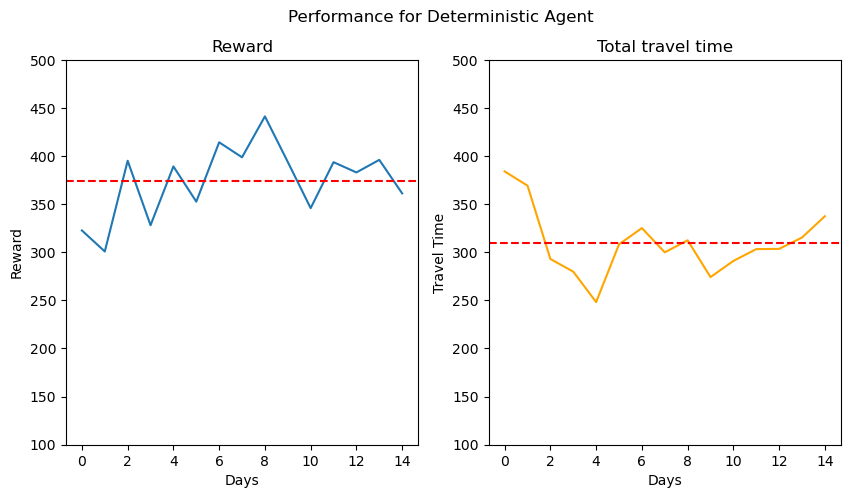

In [5]:
# A greedy agent
env = gym.make("disneyenv/Disney-v0",train = False)
reward_arr = env.ridesinfo.popularity.apply(lambda x:  5 if type(x)!=str else env.reward_dict[x]).to_numpy()

def get_action(obs,reward_arr=reward_arr):
    indicies = np.where((obs["operationStatus"]  + ~obs["pastActions"]) == 2)[0]
    if len(indicies) == 0:
        return env.action_space.n-1
    
    wait_arr = obs["waitTime"][indicies]
    reward_arr = reward_arr[indicies]
    tmp = np.argmax([reward/wait if wait != 0 else reward for wait,reward in zip(wait_arr,reward_arr)])

    action = indicies[tmp]
    return action

obs = env.reset()
episode_return = 0
episode_travel = 0
return_arr = []
travel_arr= []

while True:
    current_land = env.current_land
    action = get_action(obs)
    obs, reward, done, info = env.step(action)
    episode_return += reward
    next_land = env.current_land
    travel_time = env.adjacency_matrix[current_land][next_land]
    episode_travel += travel_time
    print("at",env.current_time," the agent travels for "+ str(travel_time) +" to go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)
    next_land = current_land


    if (done):
        return_arr += [episode_return]
        travel_arr +=[episode_travel]
        obs = env.reset()
        episode_return = 0
        episode_travel = 0
        current_land = env.current_land

    if len(return_arr) == 15:
        break

visualize_performance(return_arr, travel_arr, "Deterministic Agent")

### Random

In [ ]:
# A random agent
obs = env.reset()

episode_return = 0
episode_travel = 0
return_arr = []
travel_arr= []

while True:
    current_land = env.current_land
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    episode_return += reward
    next_land = env.current_land
    travel_time = env.adjacency_matrix[current_land][next_land]
    episode_travel += travel_time
    #print("at",env.current_time," the agent travels for "+str(travel_time)+" to go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)
    next_land - current_land


    if (done):
        return_arr += [episode_return]
        travel_arr +=[episode_travel]
        obs = env.reset()
        episode_return = 0
        episode_travel = 0
        current_land = env.current_land

    if len(return_arr) == 15:
        break

visualize_performance(return_arr,travel_arr,"Random Agent")

### PPO

### DQN

### A2C